<a href="https://colab.research.google.com/github/michaelojy85/mojy85.github.io/blob/master/StageC_Graded_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv')
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
rgsr_df = df.drop(columns='stabf')
df = df.drop(columns='stab')

In [4]:
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stabf    0
dtype: int64

In [5]:
df.dtypes

tau1     float64
tau2     float64
tau3     float64
tau4     float64
p1       float64
p2       float64
p3       float64
p4       float64
g1       float64
g2       float64
g3       float64
g4       float64
stabf     object
dtype: object

# Data Preprocessing

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold, LeaveOneOut
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import f1_score, plot_roc_curve
from sklearn.metrics import roc_auc_score, roc_curve

In [7]:
df.stabf.value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [8]:
features = df[df.columns[:-1]]
labels = df[df.columns[-1]]
features.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923


## Train model

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [10]:
# tranform training set and test set with standard scaler
scaler = StandardScaler()
X_sc = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

In [11]:
X_sc.shape  # this show that 80% of the data set has been used for training data

(8000, 12)

In [12]:
# original data set size
df.shape

(10000, 13)

In [13]:
# True positive label
pos_label = 'stable'

In [14]:
from sklearn.ensemble import RandomForestClassifier

rforest_clf = RandomForestClassifier() #random forest
rforest_clf.fit(X_sc, y_train) 

randomforest_pred = rforest_clf.predict(X_test) #random forest predictions

In [15]:
# Random Forest
print(confusion_matrix(y_test, randomforest_pred))
print(classification_report(y_test, randomforest_pred))
print(round(accuracy_score(y_test, randomforest_pred),4))

[[ 623   89]
 [  68 1220]]
              precision    recall  f1-score   support

      stable       0.90      0.88      0.89       712
    unstable       0.93      0.95      0.94      1288

    accuracy                           0.92      2000
   macro avg       0.92      0.91      0.91      2000
weighted avg       0.92      0.92      0.92      2000

0.9215


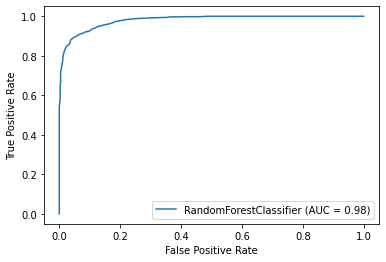

In [16]:
plot_roc_curve(rforest_clf, X_test, 
               y_test, response_method='predict_proba')

In [17]:
# calculate the percentage of positive predicted value.
precision = precision_score(y_true=y_test, y_pred=randomforest_pred, 
                            pos_label=pos_label)
recall = recall_score(y_true=y_test, y_pred=randomforest_pred, 
                      pos_label=pos_label)
f1 = f1_score(y_true=y_test, y_pred=randomforest_pred, 
              pos_label=pos_label)

print('Precision: {}'.format(round(precision*100), 2)) #prints 91.0
print('Recall: {}'.format(round(recall*100), 2)) #prints 88.0 
print('F1: {}'.format(round(f1*100), 2)) #prints 89.0

Precision: 90.0
Recall: 88.0
F1: 89.0


In [18]:
from sklearn.ensemble import ExtraTreesClassifier

xTree_clf = ExtraTreesClassifier()      #Extra Trees
xTree_clf.fit(X_sc, y_train)

xTree_pred = xTree_clf.predict(X_test)  #extra tree predictions

In [19]:
# Extra Tree
print(confusion_matrix(y_test, xTree_pred))
print(classification_report(y_test, xTree_pred))
print(accuracy_score(y_test, xTree_pred))

[[ 604  108]
 [  37 1251]]
              precision    recall  f1-score   support

      stable       0.94      0.85      0.89       712
    unstable       0.92      0.97      0.95      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.91      0.92      2000
weighted avg       0.93      0.93      0.93      2000

0.9275


In [20]:
# calculate the percentage of positive predicted value.
precision = precision_score(y_true=y_test, y_pred=xTree_pred, 
                            pos_label=pos_label)
recall = recall_score(y_true=y_test, y_pred=xTree_pred, 
                      pos_label=pos_label)
f1 = f1_score(y_true=y_test, y_pred=xTree_pred, 
              pos_label=pos_label)

print('Precision: {}'.format(round(precision*100), 2)) #prints 95.0
print('Recall: {}'.format(round(recall*100), 2)) #prints 83.0 
print('F1: {}'.format(round(f1*100), 2)) #prints 88.0

Precision: 94.0
Recall: 85.0
F1: 89.0


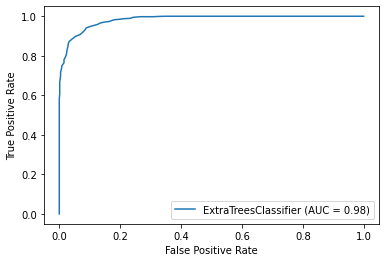

In [21]:
plot_roc_curve(xTree_clf, X_test, 
               y_test, response_method='predict_proba')

In [22]:
import xgboost as xgb
import lightgbm as lgb

#LEncoder = LabelEncoder()
#LEn_train = LEncoder.fit_transform(y_train)
#LEn_test = LEncoder.fit_transform(y_test)

d = {'stable':1, 'unstable':0}
LEn_train = y_train.map(d) # mapping 1 to 'stable' while 'unstable' to 0.
LEn_test = y_test.map(d)

In [23]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_sc, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9195


In [24]:
# converting the dataset into XGB format
dtrain = xgb.DMatrix(X_sc, label = LEn_train)
dtest = xgb.DMatrix(X_test, label=LEn_test)

#Specifying the parameter
xgb_params = { 
                'max_depth': 4,
                'eta': 0.3,
                'objectives': 'multi:softmax',
                'num_class': 2,
            }
epochs = 10

#train the model 
xgb_model = xgb.train(xgb_params, dtrain, epochs)

# predictions
xgb_pred = xgb_model.predict(dtest)

In [25]:
print(confusion_matrix(LEn_test, xgb_pred))
print(classification_report(LEn_test, xgb_pred))
print(accuracy_score(LEn_test, xgb_pred))

[[1216   72]
 [ 156  556]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1288
           1       0.89      0.78      0.83       712

    accuracy                           0.89      2000
   macro avg       0.89      0.86      0.87      2000
weighted avg       0.89      0.89      0.88      2000

0.886


In [26]:
# calculate the percentage of positive predicted value.
precision = precision_score(y_true=LEn_test, y_pred=xgb_pred, 
                            pos_label=1)
recall = recall_score(y_true=LEn_test, y_pred=xgb_pred, 
                      pos_label=1)
f1 = f1_score(y_true=LEn_test, y_pred=xgb_pred, 
              pos_label=1)

print('Precision: {}'.format(round(precision*100), 2)) #prints 89.0
print('Recall: {}'.format(round(recall*100), 2)) #prints 78.0 
print('F1: {}'.format(round(f1*100), 2)) #prints 83.0

Precision: 89.0
Recall: 78.0
F1: 83.0


In [27]:
#converting the dataset into proper LGB format 
l_train=lgb.Dataset(X_sc, label=LEn_train)

#Specifying the parameter
lgb_params = {
            'learning_rate': 0.03,
            'boosting_type': 'gbdt', #GradientBoostingDecisionTree
            'objective': 'binary', #Binary target feature
            'metric': 'binary_logloss', #metric for binary classification
            'max_depth': 10
       }

# Train model  
lgb_model = lgb.train(lgb_params, l_train, epochs)

# prediction
lgb_pred = lgb_model.predict(X_test)

In [28]:
#rounding the values
lgb_pred=lgb_pred.round(0)
#converting from float to integer
lgb_pred=lgb_pred.astype(int)

print(confusion_matrix(LEn_test, lgb_pred))
print(classification_report(LEn_test, lgb_pred))
print(accuracy_score(LEn_test, lgb_pred))

[[1286    2]
 [ 611  101]]
              precision    recall  f1-score   support

           0       0.68      1.00      0.81      1288
           1       0.98      0.14      0.25       712

    accuracy                           0.69      2000
   macro avg       0.83      0.57      0.53      2000
weighted avg       0.79      0.69      0.61      2000

0.6935


In [29]:
# calculate the percentage of positive predicted value.
precision = precision_score(y_true=LEn_test, y_pred=lgb_pred, 
                            pos_label=1)
recall = recall_score(y_true=LEn_test, y_pred=lgb_pred, 
                      pos_label=1)
f1 = f1_score(y_true=LEn_test, y_pred=lgb_pred, 
              pos_label=1)

print('Precision: {}'.format(round(precision*100), 2)) #prints 41.0
print('Recall: {}'.format(round(recall*100), 2)) #prints 81.0 
print('F1: {}'.format(round(f1*100), 2)) #prints 45.0

Precision: 98.0
Recall: 14.0
F1: 25.0


In [30]:
model = lgb.LGBMClassifier()
model.fit(X_sc, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9375


In [31]:
from sklearn.model_selection import RandomizedSearchCV

hyperparameter_grid = {
    'max_features'      : ['auto', 'sqrt', 'log2', None],
    'min_samples_leaf'  : [1, 2, 4, 6, 8],
    'min_samples_split' : [2, 3, 5, 7, 9],
    'n_estimators'      : [50, 100, 300, 500, 1000]
}# Create a based model

random_search = RandomizedSearchCV(estimator = ExtraTreesClassifier(), 
                                    param_distributions = hyperparameter_grid,
                                    n_iter=10, scoring = 'accuracy', 
                                    cv = 5, n_jobs = -1, verbose = 1, random_state=1)
random_search.fit(X_sc, y_train)

print("Best Estimator              : {}".format(random_search.best_estimator_))
print("Best Cross-Validation-Score : {}".format(random_search.best_score_))
print("Best Parameters             : {}".format(random_search.best_params_))
print("Best Index                  : {}".format(random_search.best_index_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.4min finished


Best Estimator              : ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features=None,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=8, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=1000,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)
Best Cross-Validation-Score : 0.92425
Best Parameters             : {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': None}
Best Index                  : 4


In [33]:
# Building the model 
extra_tree_forest = ExtraTreesClassifier(random_state=1) 
  
# Training the model 
extra_tree_forest.fit(X_sc, y_train)

# Computing the importance of each feature 
feature_importance = extra_tree_forest.feature_importances_

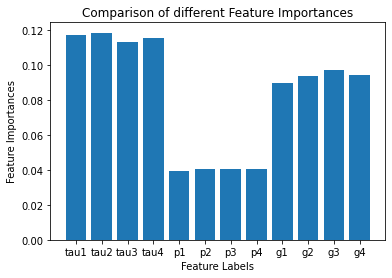

In [34]:
# Plotting a Bar Graph to compare the models 
plt.bar(X_train.columns, feature_importance) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show() 

We can see that 'tau2' feature the highest value indicating the most important while 'p1' has the lowest value which indicating that it is least important.

In [35]:
rgsr_df.corr(method='pearson')

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
tau1,1.000000,0.015586,-0.005970,-0.017265,0.027183,-0.015485,-0.015924,-0.015807,0.010521,0.015350,-0.001279,0.005494,0.275761
tau2,0.015586,1.000000,0.014273,-0.001965,-0.004769,0.006573,0.007673,-0.005963,-0.001742,0.015383,0.016508,-0.011764,0.290975
tau3,-0.005970,0.014273,1.000000,0.004354,0.016953,-0.003134,-0.008780,-0.017531,-0.011605,0.007671,0.014702,-0.011497,0.280700
tau4,-0.017265,-0.001965,0.004354,1.000000,-0.003173,0.010553,0.006169,-0.011211,-0.004149,0.008431,0.003260,-0.000491,0.278576
p1,0.027183,-0.004769,0.016953,-0.003173,1.000000,-0.573157,-0.584554,-0.579239,0.000721,0.015405,0.001069,-0.015451,0.010278
p2,-0.015485,0.006573,-0.003134,0.010553,-0.573157,1.000000,0.002388,-0.006844,0.015603,-0.018032,0.007555,0.019817,0.006255
p3,-0.015924,0.007673,-0.008780,0.006169,-0.584554,0.002388,1.000000,0.012953,-0.003219,-0.011575,-0.005897,-0.010485,-0.003321
p4,-0.015807,-0.005963,-0.017531,-0.011211,-0.579239,-0.006844,0.012953,1.000000,-0.013636,0.002850,-0.003515,0.017505,-0.020786
g1,0.010521,-0.001742,-0.011605,-0.004149,0.000721,0.015603,-0.003219,-0.013636,1.000000,0.007559,-0.005836,0.012431,0.282774
g2,0.015350,0.015383,0.007671,0.008431,0.015405,-0.018032,-0.011575,0.002850,0.007559,1.000000,-0.012809,-0.014909,0.293601
